### Loading Data & Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from thefuzz import process,fuzz

### Remove Warning

In [3]:
import warnings
warnings.filterwarnings('ignore', category = UserWarning, module ='openpyxl')

In [4]:
# read dataset
candyData = pd.read_excel("candyhierarchy2017.xlsx")

### Show Sample Of Data

In [5]:
candyData.sample(4)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
386,90273839,No,Male,41,USA,Washington,JOY,MEH,JOY,MEH,...,NaN,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(68, 16)"
1600,90280873,No,Female,51,Usa,"Portland, maine",MEH,MEH,JOY,MEH,...,Hershey's kisses,Can't wait to see the data.,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Friday,NaN,NaN,NaN,1.0,"(79, 78)"
1978,90284429,No,Male,34,USA,DC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1800,90282115,No,Female,37,usa,MA,JOY,MEH,JOY,NaN,...,NaN,NaN,White and gold,NaN,Friday,NaN,NaN,1.0,NaN,"(38, 91)"


### Show More Info

In [6]:
candyData.shape

(2460, 120)

In [7]:
candyData.isna().sum() 

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

In [8]:
candyData.duplicated().any()

False

In [9]:
candyData.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


### Above cells' conclusion

- Dataset has a lot of missing values
- Dataset has no complete duplicates
- We need to remove some columns not use
- We need to modify some column datatype
- We need to rename some column name to avoid confusion

## Cleaning

In [10]:
# show columns that hase more 50 % nan value

for i in range(len(candyData.isnull().sum())):
    if candyData.isna().sum()[i] >1229 :
        print(f"Column {candyData.isna().sum().index[i]} contains {candyData.isna().sum()[i]} nan value\n")

Column Q7: JOY OTHER contains 1549 nan value

Column Q8: DESPAIR OTHER contains 1743 nan value

Column Q9: OTHER COMMENTS contains 2074 nan value

Column Unnamed: 113 contains 2451 nan value

Column Q12: MEDIA [Daily Dish] contains 2375 nan value

Column Q12: MEDIA [ESPN] contains 2361 nan value

Column Q12: MEDIA [Yahoo] contains 2393 nan value



#### We don't remove `Q12` columns but we try to fixed it

In [11]:
# drop columns we not used

candyData.drop(columns = ["Internal ID", "Unnamed: 113", "Click Coordinates (x, y)"], inplace = True)

In [12]:
# drop columns that contain more than 50 % nan value

candyData.drop(columns=["Q7: JOY OTHER", "Q8: DESPAIR OTHER", "Q9: OTHER COMMENTS"],inplace= True)

In [13]:
# handle columns name

# 1- create dictionary key is old name and value is new name
newNames = {"Q1: GOING OUT?" :"going out", "Q2: GENDER": "gender", "Q3: AGE": "age", "Q4: COUNTRY": "country",
            "Q10: DRESS" : "dress", "Q12: MEDIA [Science]":"Science","Q11: DAY": "day", "Q12: MEDIA [Daily Dish]":"Daily Dish",
            "Q12: MEDIA [ESPN]":"ESPN", "Q12: MEDIA [Yahoo]":"Yahoo"}

# 2- rename columns
candyData.rename(columns = newNames, inplace= True)

In [14]:
# show sample of dataframe

candyData.sample(3)

,going out,gender,age,country,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),...,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,dress,day,Daily Dish,Science,ESPN,Yahoo
2155,NaN,Male,40,USA,TX,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,...,MEH,DESPAIR,DESPAIR,MEH,White and gold,Sunday,NaN,1.0,NaN,NaN
2304,No,Female,42,USA,California,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,...,JOY,MEH,MEH,JOY,White and gold,Friday,NaN,1.0,NaN,NaN
1303,No,Female,36,United States,Georgia,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,...,MEH,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN


### Cleaning  `going out` column

In [15]:
# show unique values

candyData["going out"].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [16]:
# output value counts of each unique values

candyData["going out"].value_counts(dropna = False)

No     2038
Yes     312
NaN     110
Name: going out, dtype: int64

In [17]:
# fill nan value with maybe (yse,no)

candyData["going out"].fillna("MayBe",inplace= True)

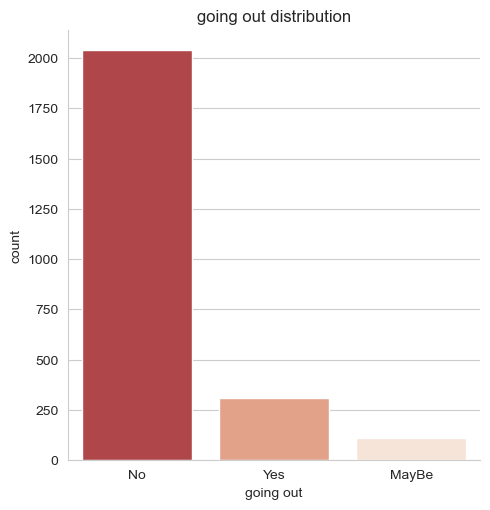

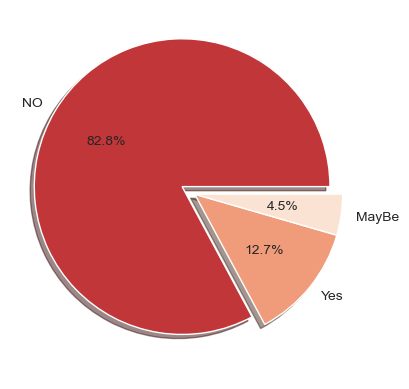

In [18]:
# visualized going out column

# 1- create countplot
sns.set_style("whitegrid")
sns.set_palette("RdBu")
sns.catplot(x = "going out", data = candyData, order = candyData["going out"].value_counts().index, kind = "count")
plt.title("going out distribution")
plt.show()

# 2- create pie chere
values = candyData["going out"].value_counts()
plt.pie(values, labels = ["NO", "Yes", "MayBe"], shadow = True, autopct = "%1.1f%%", explode = [0.1,0,0])
plt.show()

- #### Most people are not going out

### Cleaning `Gender` column

In [19]:
# show unique values

candyData["gender"].unique()

array([nan, 'Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [20]:
# output value counts of each unique values

candyData["gender"].value_counts(dropna = False)

Male                  1467
Female                 839
I'd rather not say      83
NaN                     41
Other                   30
Name: gender, dtype: int64

In [21]:
# fill nan value 

candyData["gender"].fillna("I'd rather not say",inplace= True)

In [22]:
# replace Other with I'd rather not say

candyData["gender"].replace("Other", "I'd rather not say", inplace= True)

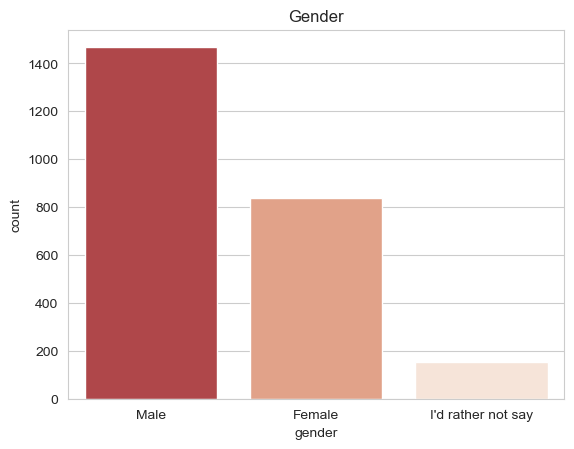

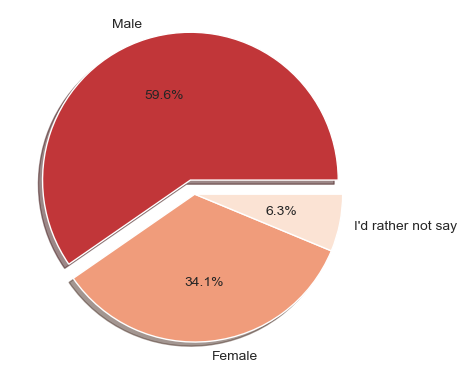

In [23]:
# visualized gender column

# 1- create countplot
sns.countplot(x = "gender", data = candyData, order = candyData["gender"].value_counts().index)
plt.title("Gender")
plt.show()

# 2- create pie chere
values = candyData["gender"].value_counts()
plt.pie(values, labels = ["Male", "Female", "I'd rather not say"], shadow = True, autopct = "%1.1f%%", explode = [0.1,0,0])
plt.show()

- #### Male is the most common gender

### Cleaning `age` column

In [24]:
# show unique values

candyData["age"].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [25]:
# replace no nomeric values to nan value

candyData['age'] = pd.to_numeric(candyData["age"], errors = "coerce")

In [26]:
# show how many nan value 

candyData["age"].isna().sum()

108

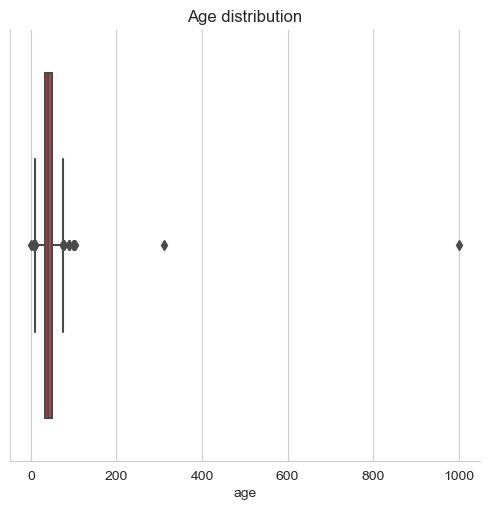

In [27]:
# show summary statistic

sns.catplot(x = "age", data = candyData, kind = "box")
plt.title("Age distribution")
plt.show()

### `age` column has outliers we need to fixed

In [28]:
# fixed outlier

Q1, Q3 = candyData["age"].quantile(0.25), candyData["age"].quantile(0.75)

IQR = Q3 - Q1

Upper = Q3 + (1.5 * IQR)
Lower = Q1 - (1.5 * IQR)

# replace out of range with nan value
candyData.loc[(candyData["age"] > Upper) | (candyData["age"] < Lower), "age"] = np.nan

In [29]:
# fill nan value with mean

average = candyData["age"].mean()
candyData["age"].fillna(average, inplace = True)

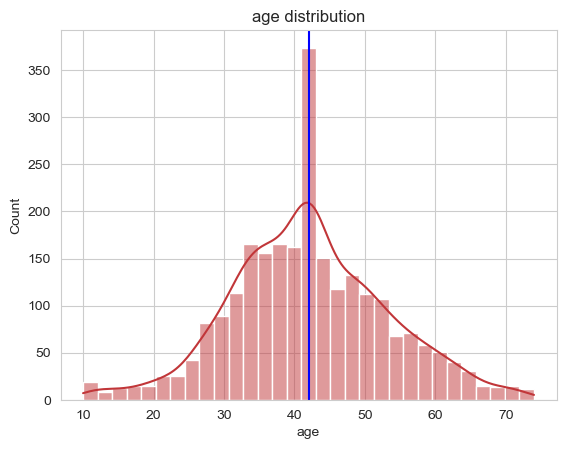

In [30]:
sns.histplot(x = "age", data = candyData, kde = True)
plt.axvline(candyData.age.mean(), color = "b")
plt.title("age distribution")
plt.show()

- #### Most people who did the survey were between 35 and 50

### Cleaning `country` column

In [31]:
# show unique values

candyData["country"].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

In [32]:
# fixed some errors

# 1- convert all value to lower case
candyData["country"] = candyData["country"].str.upper()

# 2- remove extra spaces 
candyData["country"] = candyData["country"].str.strip()

In [33]:
# show how many nan value 

candyData["country"].isna().sum() 

69

In [34]:
# fill nan value

candyData["country"].fillna("Other", inplace = True)

In [35]:
# show again unique value

candyData["country"].unique()

array(['Other', 'USA', 'US', 'CANADA', 'MURICA', 'UNITED STATES', 'UK',
       'UNITED KINGDOM', 'UNITED STAES', 'UNITED STATES OF AMERICA',
       'UAE', 'ENGLAND', 'MEXICO', 'U.S.A.', 'USAUSAUSA', 'AMERICA',
       'FRANCE', 'FINLAND', 'UNHINGED STATES', 'US OF A', 'UNITES STATES',
       'THE UNITED STATES', 'NORTH CAROLINA', 'UNIED STATES',
       'NETHERLANDS', 'GERMANY', 'EUROPE', 'EARTH', 'U S', 'U.S.', 'U.K.',
       'COSTA RICA', 'THE UNITED STATES OF AMERICA', 'UNITE STATES',
       'CASCADIA', 'AUSTRALIA', 'INSANITY LATELY', 'GREECE',
       'USA? HARD TO TELL ANYMORE..', "'MERICA", 'USAS', 'PITTSBURGH',
       'UNITED STATE', 'A', 'CAN', 'CANAE', 'NEW YORK', 'TRUMPISTAN',
       'IRELAND', 'UNITED SATES', 'KOREA', 'CALIFORNIA', 'JAPAN',
       'SOUTH AFRICA',
       'I PRETEND TO BE FROM CANADA, BUT I AM REALLY FROM THE UNITED STATES.',
       'ICELAND', 'CANADA`', 'SCOTLAND', 'DENMARK', 'UNITED STATED',
       'SWITZERLAND', 'AHEM....AMERCA', 'UD', 'SOUTH KOREA', 'NEW JERS

In [36]:
# fixed some errors

# 1- create list of countries 
correct_countries = ["USA", "UNITED STATES", "CANADA", "AMERICA", "UNITED KINGDOM"]

# 2- Replace name of country with the corresponding name
for test in correct_countries:
    matches = process.extract(test, candyData['country'], limit = candyData.shape[0])
    
    for matching in matches:
        if matching[1] >= 80:
            candyData.loc[candyData['country'] == matching[0], 'country'] = test
            
# 3- remove dot 
candyData["country"] = candyData["country"].str.replace(".","")

# 4- Convert all that is equivalent USA 
candyData["country"] = candyData["country"].replace(["UNITED STATES", "AMERICA", "NEW JERSEY", "U S A","US OF A",
                                                     "NORTH CAROLINA", "NEW YORK", "USA? HARD TO TELL ANYMORE","USA",
                                                     "MEXICO", "CALIFORNIA"],"USA")

# 5-  Convert all that is equivalent UK
candyData["country"] = candyData["country"].replace(["UK", "UNITED KINGDOM", "ENDLAND", "FRANCE"], "UK")


# 6 replace all values with Other word
for word in candyData["country"]:
    if word != "USA" and  word != "UK" and  word != "CANADA" :
        candyData["country"] = candyData["country"].str.replace(word, "Other")
        
# 7- replace all values with Other word
candyData["country"] = candyData["country"].replace({"SOUTH Other" : "Other", "THE Other" : "Other"})

C:\Users\Ahmed_abbas\AppData\Local\Temp\ipykernel_7108\1125606081.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  candyData["country"] = candyData["country"].str.replace(".","")


In [37]:
# show again unique value

candyData["country"].unique()

array(['Other', 'USA', 'CANADA', 'UK'], dtype=object)

In [38]:
# output value counts of each unique values

candyData["country"].value_counts()

USA       2049
CANADA     226
Other      148
UK          37
Name: country, dtype: int64

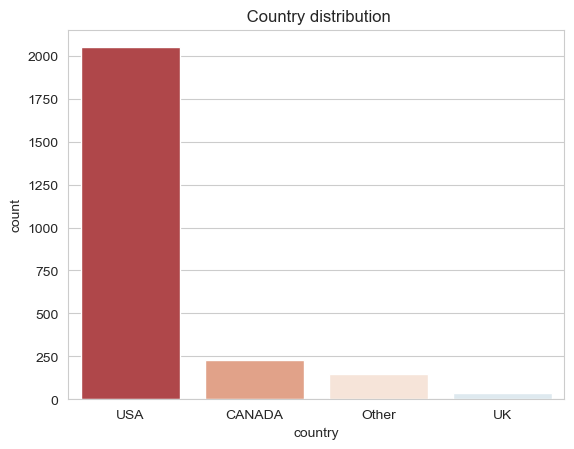

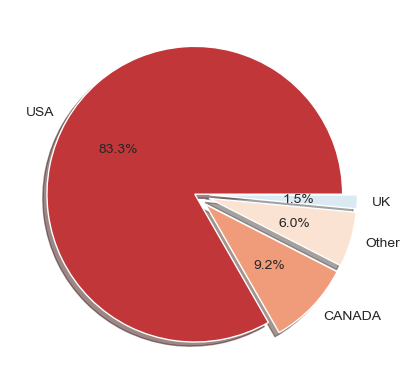

In [39]:
# visualized country column

# 1- create countplot
sns.countplot(x = "country", data = candyData, order = candyData["country"].value_counts().index)
plt.title(" Country distribution")
plt.show()

# 2- create pie chere
values = candyData["country"].value_counts()
plt.pie(values, labels = ["USA", "CANADA", "Other", "UK"], shadow = True, autopct = "%1.1f%%", explode = [0,0.1,0.1,0.1])
plt.show()

- #### Most people from USA and Canada

### Cleaning `dress` column

In [40]:
# show unique values

candyData["dress"].unique()

array([nan, 'White and gold', 'Blue and black'], dtype=object)

In [41]:
# output value counts of each unique values

candyData["dress"].value_counts(dropna = False)

White and gold    1081
NaN                744
Blue and black     635
Name: dress, dtype: int64

In [42]:
# fill nan value

candyData["dress"].fillna("Other colors", inplace = True)

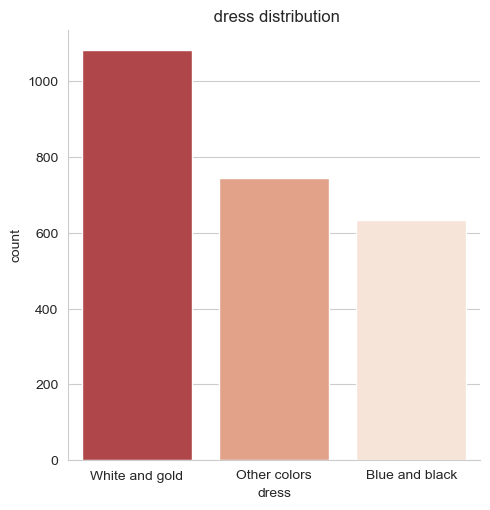

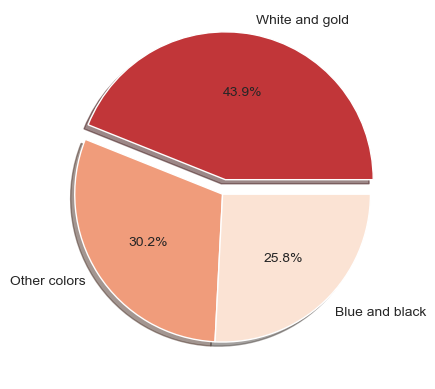

In [43]:
# visualized dress column

# 1- create countplot
sns.catplot(x = "dress", data = candyData, order = candyData["dress"].value_counts().index, kind = "count")
plt.title(" dress distribution")
plt.show()

# 2- create pie chere
values = candyData["dress"].value_counts()
plt.pie(values, labels = ["White and gold", "Other colors", "Blue and black"], shadow = True, autopct = "%1.1f%%", explode = [0.1,0,0])
plt.show()

- #### Most people like dress white and gold

### Cleaning `day` column

In [44]:
# show unique values

candyData["day"].unique()

array([nan, 'Sunday', 'Friday'], dtype=object)

In [45]:
# output value counts of each unique values

candyData["day"].value_counts(dropna = False)

Friday    1091
NaN        725
Sunday     644
Name: day, dtype: int64

In [46]:
# fill nan value 

candyData["day"].fillna("Other Day", inplace = True)  

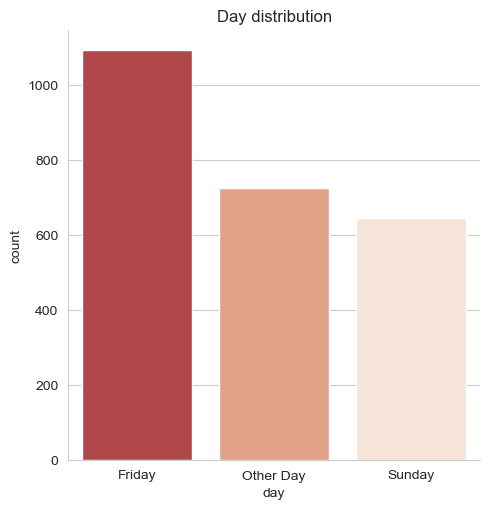

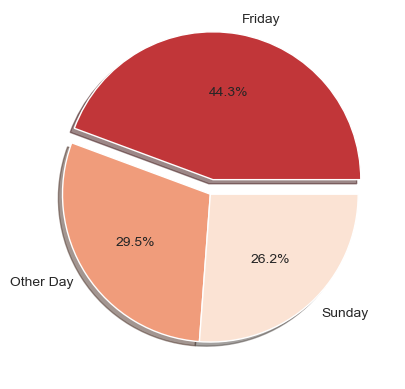

In [47]:
# visualized day column

# 1- create countplot
sns.catplot(x = "day", data = candyData, order = candyData["day"].value_counts().index, kind = "count")
plt.title("Day distribution")
plt.show()

# 2- create pie chere
values = candyData["day"].value_counts()
plt.pie(values, labels = ["Friday", "Other Day", "Sunday"], shadow = True, autopct = "%1.1f%%", explode = [0.1,0,0])
plt.show()

- #### Most people preferred friday

### Create  `MEDIA ` column 

In [48]:
media = candyData[candyData.columns[-4:]]

In [49]:
# fill nan value with No 

media = media.fillna("NO")

In [50]:
# Show most website checked out

# 1- craate list of media category
media_category = ["Science", "ESPN", "Daily Dish", "Yahoo"]

# 2- create dictionary key is media category and value is number of ones
media_used = {}

# 3- loop of list madie to get number of ones
for category in media_category:
    media_used[category] = len(candyData[candyData[category] == 1.0])
    
# 4- calculation number of No answer 
media_used["No answer"] = candyData.shape[0] - sum(media_used.values())

# 5- sorte media_used by values
media_used = dict(sorted(media_used.items(), key = lambda item : item[1] ,reverse = True))

# 6- get all keys in media_used
keys = list(media_used.keys())

# 7- get all values in media_used
values = list(media_used.values())

In [51]:
# create media column and fill with nan value

candyData["media"] = np.nan

In [52]:
# fill nan value using media used dictionary

for key,value in media_used.items():
    candyData["media"].fillna(key,limit = value,inplace = True)

In [53]:
# output value counts of each unique values

candyData["media"].value_counts()

Science       1362
No answer      847
ESPN            99
Daily Dish      85
Yahoo           67
Name: media, dtype: int64

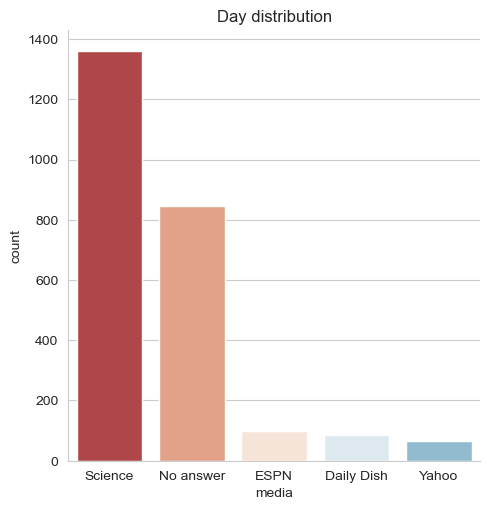

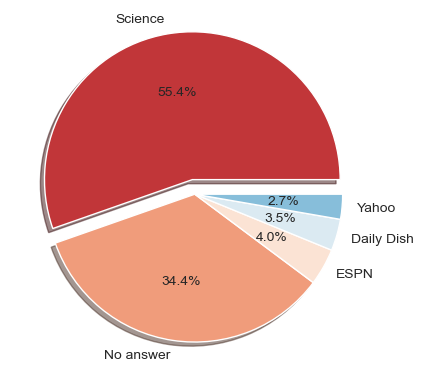

In [54]:
# visualized day column

# 1- create countplot
sns.catplot(x = "media", data = candyData, order = candyData["media"].value_counts().index, kind = "count")
plt.title("Day distribution")
plt.show()

# 2- create pie chere
plt.pie(values, labels = keys, shadow = True, autopct = "%1.1f%%", explode = [0.1,0,0,0,0])
plt.show()

- #### Science is the most  website checked out

# Create new DataFrame `candy`

In [55]:
# 1- create list of Question columns 
Question = [candy for candy in candyData.columns if 'Q6' in str(candy)]

# 2- create dataframe call candy
candy = pd.DataFrame(candyData[Question])

In [56]:
# show sample of dataframe

candy.sample(5)

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,...,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,MEH,DESPAIR,JOY,...,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY
2219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,JOY,DESPAIR,JOY,MEH,NaN,NaN,JOY,DESPAIR,DESPAIR,JOY,...,JOY,MEH,MEH,JOY,NaN,NaN,NaN,DESPAIR,DESPAIR,JOY
1494,JOY,JOY,JOY,NaN,NaN,NaN,MEH,DESPAIR,DESPAIR,JOY,...,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY


In [57]:
candy.shape

(2460, 103)

In [58]:
# show how many nan value in each column

candy.isna().sum()

Q6 | 100 Grand Bar                                                                        747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    734
Q6 | Any full-sized candy bar                                                             672
Q6 | Black Jacks                                                                          958
Q6 | Bonkers (the candy)                                                                  992
                                                                                         ... 
Q6 | Vicodin                                                                              789
Q6 | Whatchamacallit Bars                                                                 823
Q6 | White Bread                                                                          757
Q6 | Whole Wheat anything                                                                 747
Q6 | York Peppermint Patties                                

### From  above 

- We need to fill nan value with other value
- We need to rename column name to avoid confusion

## Cleaning

In [59]:
# fill nan value 

candy.fillna("unknown", inplace = True)

In [60]:
# handle candy columns name

# 1- create  dictionary key is old name and value is new name of each column
names = {}

# 2- loop over columns to fixed name and store old and new name in names
for col in candy.columns:
    names[col] = col.strip("Q6 | ")
    
# 3- rename columns
candy.rename(columns = names, inplace= True)

In [61]:
candy.sample(3)

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
1207,MEH,MEH,JOY,MEH,JOY,JOY,JOY,MEH,DESPAIR,JOY,...,JOY,JOY,MEH,JOY,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY
1741,JOY,MEH,JOY,DESPAIR,unknown,unknown,unknown,MEH,DESPAIR,JOY,...,MEH,JOY,JOY,JOY,unknown,unknown,JOY,MEH,MEH,JOY
1155,JOY,JOY,JOY,MEH,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,...,JOY,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,MEH,JOY,JOY


In [81]:
# handle candy columns

def visualizing(reversed):
    # 1- create create dictionary key is Question and value is number of ones
    candy_score = {}

    # 2- loop over columns to get number of ones of each column
    for column in candy.columns:
        candy_score[column] = len(candy[candy[column] == "JOY"])

    # 3- sorte candy_score by values
    candy_score = dict(sorted(candy_score.items(), key = lambda item : item[1] ,reverse = reversed))

    # 4- get all keys in candy_score
    keys = list(candy_score.keys())

    # 5- get all values in candy_score
    values = list(candy_score.values())
    
    # 6- visualizing columns
    sns.barplot(x = keys[:5], y = values[:5])
    plt.title("Candy distirbution")
    plt.xlabel("Count"); plt.ylabel("Candy")
    plt.xticks(rotation = 55)
    plt.show()

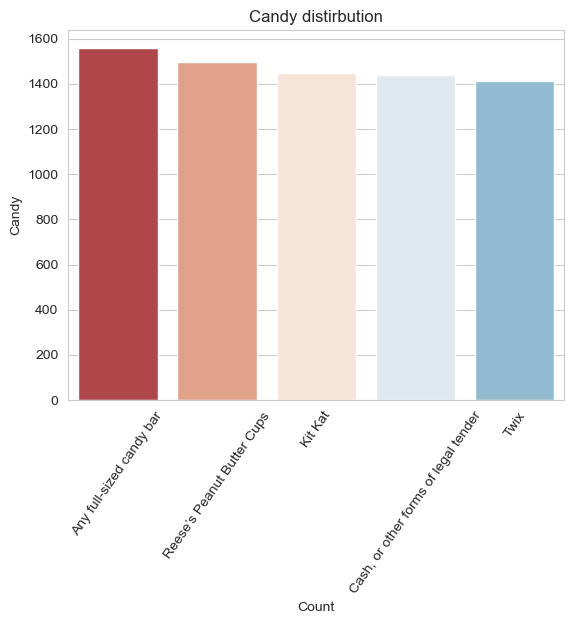

In [82]:
# Top five favorite candy

visualizing(True)

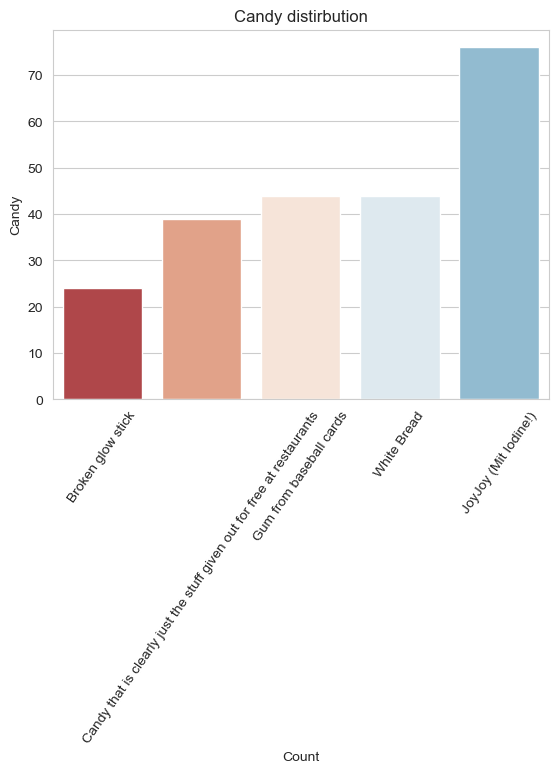

In [83]:
# First five hated candy

visualizing(False)

### Relationship between `categorical` columns

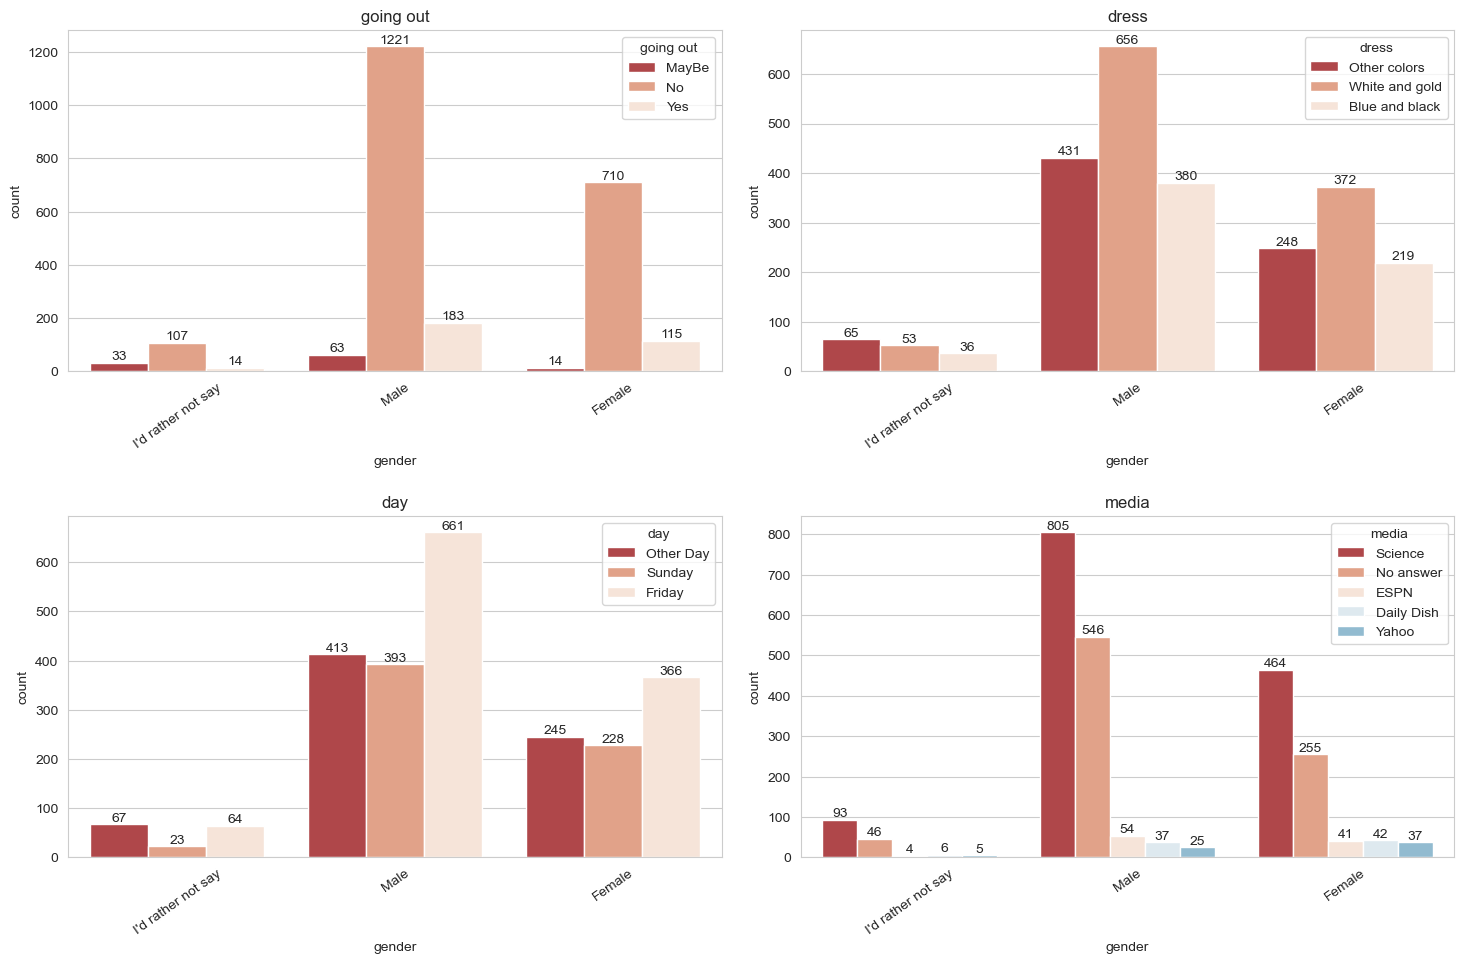

In [84]:
# create list of columns
catColumns = ["going out", "dress", "day", "media"]

# 1- set figure size
plt.figure(figsize=(15, 10))

# 2- loop over objcolumns list to plot columns
for index, col in enumerate(catColumns):
    plt.subplot((len(catColumns) + 1) // 2, 2, index + 1)
    graph = sns.countplot(x = "gender", data = candyData, hue = col)
    for container in graph.containers:
        graph.bar_label(container)
        
    plt.title(col) # set title to each plot
    plt.xticks(rotation = 35)
    
# 3- set layout between two plots
plt.tight_layout(pad = 2)
plt.show()

In [88]:
# Create data frame call candy Summary

data = {"candy name" : list(candy_score.keys()), "candy score" : list(candy_score.values())}
candySummary = pd.DataFrame(data)

In [89]:
# add columns to new data frame

candySummary["gender"] = candyData[["gender"]]
candySummary["country"] = candyData[["country"]]

In [90]:
candySummary

,candy name,candy score,gender,country
0,100 Grand Bar,873,I'd rather not say,Other
1,Anonymous brown globs that come in black and o...,176,Male,USA
2,Any full-sized candy bar,1559,Male,USA
3,Black Jacks,92,Male,USA
4,Bonkers (the candy),116,Male,USA
...,...,...,...,...
98,Vicodin,707,Female,USA
99,Whatchamacallit Bars,840,Female,USA
100,White Bread,44,I'd rather not say,Other
101,Whole Wheat anything,117,Male,USA


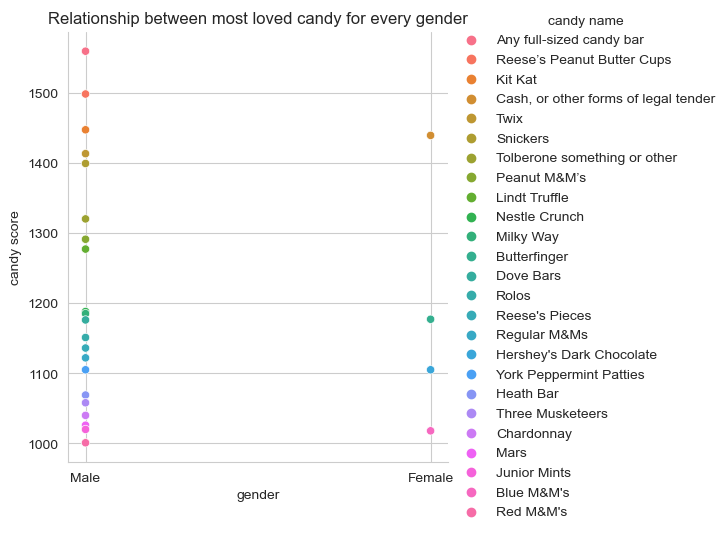

In [100]:
sns.relplot(x = "gender", y = "candy score", hue="candy name", data =candySummary.sort_values(by = 'candy score', 
            ascending = False).head(25),kind = "scatter")
plt.title("Relationship between most loved candy for every gender")
plt.show()

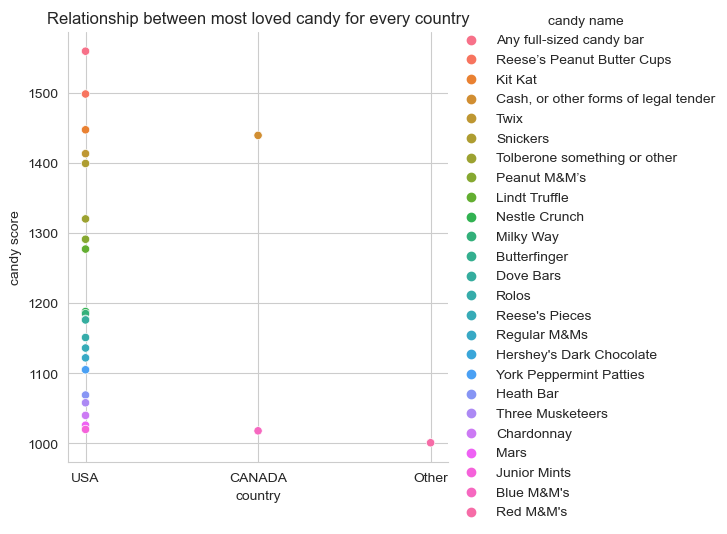

In [102]:
sns.relplot(x = "country", y = "candy score", hue="candy name", data =candySummary.sort_values(by = 'candy score', 
            ascending = False).head(25),kind = "scatter")
plt.title("Relationship between most loved candy for every country")
plt.show()